In [1]:
import os

os.getcwd()   

'c:\\Users\\candi\\DESKTOP-E7E45UI\\Desktop\\Penn State\\Classes\\Year 4\\DAAN 881\\Lesson 7_NLP\\Tweet data from Kaggle\\archive1'

In [22]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [28]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Tokenization

In [24]:

# Perform tokenization on the sample tweets

# from the nltk corpous import twitter_samples and rename it as ts
from nltk.corpus import twitter_samples as ts

# show the contents of the corpus
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [25]:
# Get a sample of tweets from the corpus
samples_tw = ts.strings('tweets.20150430-223406.json')

# see one sample tweet
samples_tw[20]

"@B0MBSKARE the anti-Scottish feeling is largely a product of Tory press scaremongering. In practice most people won't give a toss!"

In [26]:
# Tokenize a sample tweet

# import the in-built word tokenizer and rename it wtoken

from nltk.tokenize import word_tokenize as wtoken
wtoken(samples_tw[20])

['@',
 'B0MBSKARE',
 'the',
 'anti-Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'wo',
 "n't",
 'give',
 'a',
 'toss',
 '!']

In [27]:
# Split text based on punctuation:

from nltk import wordpunct_tokenize
wordpunct_tokenize(samples_tw[20])

['@',
 'B0MBSKARE',
 'the',
 'anti',
 '-',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 '.',
 'In',
 'practice',
 'most',
 'people',
 'won',
 "'",
 't',
 'give',
 'a',
 'toss',
 '!']

In [28]:
# Build a custom tokenizer using RegEx patterns

from nltk import regexp_tokenize
patn = '\w+'
regexp_tokenize(samples_tw[20],patn)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\candi\AppData\Local\Temp\ipykernel_34016\2675075224.py:4: SyntaxWarning: invalid escape sequence '\w'
  patn = '\w+'


['B0MBSKARE',
 'the',
 'anti',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 'In',
 'practice',
 'most',
 'people',
 'won',
 't',
 'give',
 'a',
 'toss']

In [29]:


patn = '\w+|[!,\-,]'
regexp_tokenize(samples_tw[20],patn)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\candi\AppData\Local\Temp\ipykernel_34016\2402310839.py:1: SyntaxWarning: invalid escape sequence '\w'
  patn = '\w+|[!,\-,]'


['B0MBSKARE',
 'the',
 'anti',
 '-',
 'Scottish',
 'feeling',
 'is',
 'largely',
 'a',
 'product',
 'of',
 'Tory',
 'press',
 'scaremongering',
 'In',
 'practice',
 'most',
 'people',
 'won',
 't',
 'give',
 'a',
 'toss',
 '!']

Stemming


In [30]:
# import PorterStemmer package for stemming
from nltk.stem import PorterStemmer

# create a stemming instance
stemming = PorterStemmer()

# Perform stemming
stemming.stem("enjoying")
stemming.stem("enjoys")
stemming.stem("enjoyable")

'enjoy'

In [36]:
#Create a RegEx stemmer that removes ‘able’ or ‘ing’ with 4 as the minimum length of string to stem

#from nltk.stem import
#RegexpStemmer regexp_stemmer = RegexpStemmer("able$|ing$",min=4)
#regexp_stemmer.stem("flyable")
#regexp_stemmer.stem("flying")

Stopwords

In [31]:
# import the stopwords package from nltk.corpus

from nltk.corpus import stopwords

# Use the English stopwords

sw_l = stopwords.words('english')

# show the stopwords from the “English” language

sw_l[20:40]

['himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this']

In [32]:
# Remove stopwords from an example sentence

example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords=[word for word in example_text.split()
if word not in sw_l]
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

In [33]:
# NLTK provides stop word corpora for 21 languages. Looking at the percentage of stop words in a specific text corpus:

# import the gutenburg corpus and extract all the words

from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')

# Get all the stopwords for the English language

from nltk.corpus import stopwords

sw_l = stopwords.words('english')

# Retrieve all the words from the gutenburg corpus after removing the stopwords

words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]

# Compute the percentage of actual words in the gutenburg corpus

len(words_in_hamlet_without_sw)*100.0/len(words_in_hamlet)

69.26124197002142

In [34]:
# Analyzing the Web text data in NLTK

# import the webtext corpus

from nltk.corpus import webtext

# retrieve all the sentences from the corpus

webtext_sentences = webtext.sents('firefox.txt')

# retrieve all the words in the corpus

webtext_words = webtext.words('firefox.txt')

# get the statistics of the corpus

# Total number of sentences

len(webtext_sentences)

1144

In [41]:
# Total number of words

len(webtext_words)

102457

In [35]:
# determine the size of the vocabulary

vocabulary = set(webtext_words)
len(vocabulary)

8296

In [40]:
# Determine the frequency distribution of words

# What are the top 30 words in a document?

frequency_dist = nltk.FreqDist(webtext_words)
sorted(frequency_dist, key=frequency_dist.__getitem__,reverse=True)[0:30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

<Axes: xlabel='Samples', ylabel='Counts'>

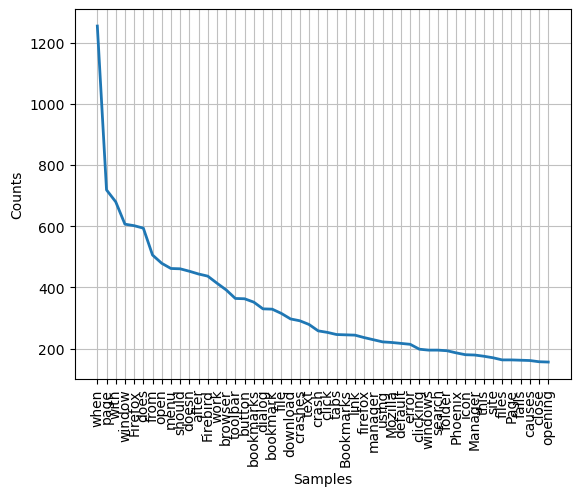

In [41]:
# Determine the frequency distribution of the larger words in the corpus

large_words = dict([(k,v) for k,v in frequency_dist.items() if
len(k)>3])
frequency_dist = nltk.FreqDist(large_words)

# install matplotlib

import matplotlib

#import pylab from the matplotlib package

from matplotlib import pylab

# Plot the frequency distribution plot

frequency_dist.plot(50,cumulative=False)

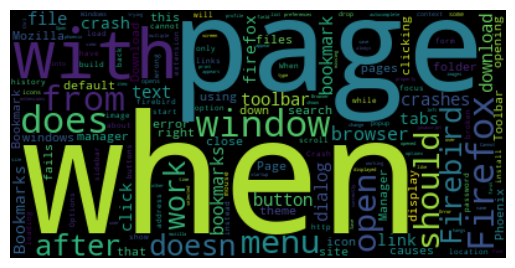

In [42]:
# Create a word cloud

# install wordcloud

import wordcloud

# Obtaining the frequency distribution of words and using the bilinear interpolation to construct the word cloud

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)

# import the matplotlib.pyplot package

import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")



plt.show()

POS tagging

In [43]:
# Import the nltk package and perform tokenization

import nltk
text1 = nltk.word_tokenize("I left the room")
text2 = nltk.word_tokenize("Left of the room")

# Perform universal POS tagging

nltk.pos_tag(text1,tagset='universal')



[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]

### Sentiment analysis 

In [3]:
## Load the data 

train= pd.read_csv('train.csv', encoding='ISO-8859-1')
test = pd.read_csv('test.csv', encoding='ISO-8859-1')


#### Data preprocessing

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


#### Handling missing values 

In [6]:
train.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [7]:
train.dropna(inplace=True)

In [8]:
train.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [9]:
test.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [10]:
test.dropna(inplace=True)
test.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

#### Stopwords and lowercase text

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\candi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Text preprocessing function that removes stopwords and convert text to lowercase

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [13]:
# Apply preprocessing on train dataset
train['processed_text'] = train['text'].apply(preprocess_text)
train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),processed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,"i`d responded, going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,sooo sad miss san diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,boss bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,interview! leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,"sons ****, couldn`t put releases already bought"


In [14]:
# Apply preprocessing on test dataset
test['processed_text'] = test['text'].apply(preprocess_text)
test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),processed_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting (precisely -- sk...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,"recession hit veronique branquinho, quit compa..."
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,http://twitpic.com/4w75p - like it!!


#### Check if sentiment labels are balanced


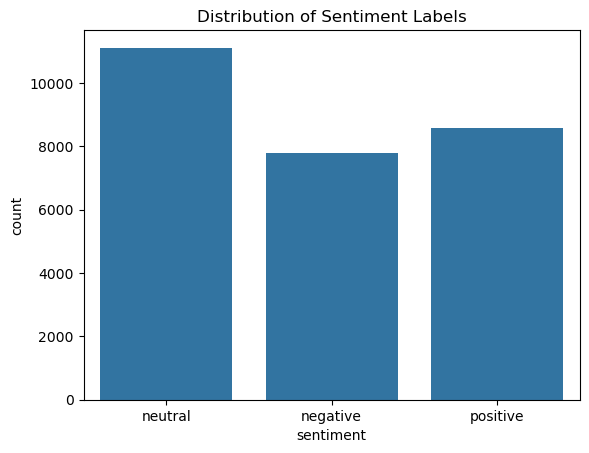

In [15]:
# Distribution of sentiment labels
sns.countplot(x='sentiment', data=train)
plt.title("Distribution of Sentiment Labels")
plt.show()

#### Machine learning models

In [16]:
# Convert text data to TF-IDF for ML models
## Preparing text data for a machine learning by converting it into numerical features (TF-IDF scores).

vectorizer = TfidfVectorizer(max_features=1000)
train_TFIDF = vectorizer.fit_transform(train['processed_text'])
test_TFIDF = vectorizer.transform(test['processed_text'])

# Assign X and y for the training data
X_train= train_TFIDF
y_train = train['sentiment']


# Assign x and y for testing data
X_test = test_TFIDF
y_test = test['sentiment']


In [17]:
## SVM model

# Train SVM classifier

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# Evaluate classifiers
# Make predictions on the test data
predictions = svm_classifier.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))


# Achieves an accuracy of 70%, indicating that 70% of the documents were correctly classified across all categories.
# Shows strong performance in most categories, except for neutal, where it struggles with lower recall (63%). 
# Recall measures the ratio of correctly predicted positive observations to the all observations in the actual class.
# F1-scores are are considered average, indicating a balance between precision and recall for these categories. 
# The F1-score is the weighted average of precision and recall, where an F1 score reaches its best value at 1 and worst at 0.


Accuracy: 0.7031692133559706
              precision    recall  f1-score   support

    negative       0.74      0.57      0.65      1001
     neutral       0.63      0.78      0.70      1430
    positive       0.80      0.72      0.76      1103

    accuracy                           0.70      3534
   macro avg       0.72      0.69      0.70      3534
weighted avg       0.71      0.70      0.70      3534



In [19]:
### Naive bayes

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Evaluate classifiers
# Make predictions on the test data
NB_predictions = NB_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, NB_predictions)}")
print(classification_report(y_test, NB_predictions))



# Achieves an accuracy of 66%, indicating that 66% of the documents were correctly classified across all categories.
# Shows strong performance in most categories, except for neutral, where it struggles with lower recall (57%).
# F1-scores are average indicating a balance between precision and recall for these categories. 


Accuracy: 0.657328805885682
              precision    recall  f1-score   support

    negative       0.76      0.49      0.60      1001
     neutral       0.57      0.82      0.67      1430
    positive       0.79      0.60      0.68      1103

    accuracy                           0.66      3534
   macro avg       0.71      0.64      0.65      3534
weighted avg       0.69      0.66      0.65      3534



In [21]:
# Provide custom input text
input_text = ["Absolutely amazing product!"]

input_TFIDF = vectorizer.transform(input_text)
predicted_sentiment = NB_model.predict(input_TFIDF)
print(f"Predicted sentiment: {predicted_sentiment[0]}")

Predicted sentiment: positive
